In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats


In [2]:
infile = pd.read_csv("Austin_Distances.csv")
df = pd.DataFrame(infile)

In [3]:
df.head(3)

,School,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Percent in Poverty,Zip Code
0,Allison Elementary,Austin,H-E-B,"2110 W Slaughter Ln, Austin",1.0,1.3,92.00,78748
1,Andrews Elementary School,Austin,H-E-B,"7112 Ed Bluestein Blvd #125, Austin",1.2,1.6,91.02,78723
2,Becker Elementary School,Austin,H-E-B,"2400 S Congress Ave, Austin",1.3,1.3,64.52,78704


In [16]:
pov_by_zip = df.groupby(["Zip Code"])["Percent in Poverty"].mean()
pov_by_zip

Zip Code
78702    83.997143
78703    33.930000
78704    76.557500
78721    74.963333
78722    81.450000
78723    80.210000
78724    78.885000
78735    93.090000
78741    92.520000
78744    83.807500
78745    75.203333
78748    75.586000
78749    83.540000
78751    77.290000
78752    75.216667
78753    92.944000
78757    91.415000
78758    85.640000
Name: Percent in Poverty, dtype: float64

In [28]:
pov_by_zip.to_csv("pvz.csv")

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [31]:
infile = pd.read_csv("pvz.csv")
pov_by_zip_df = pd.DataFrame(infile)

In [32]:
pov_by_zip_df

,Zip Code,Percent in Poverty
0,78702,83.997143
1,78703,33.930000
2,78704,76.557500
3,78721,74.963333
4,78722,81.450000
5,78723,80.210000
6,78724,78.885000
7,78735,93.090000
8,78741,92.520000
9,78744,83.807500


In [86]:
# Transform the dataframe by switching x and y axis. "T" may be a legacy function.

pov_by_zip_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Zip Code,78702.000000,78703.00,78704.0000,78721.000000,78722.00,78723.00,78724.000,78735.00,78741.00,78744.0000,78745.000000,78748.000,78749.00,78751.00,78752.000000,78753.000,78757.000,78758.00
Percent in Poverty,83.997143,33.93,76.5575,74.963333,81.45,80.21,78.885,93.09,92.52,83.8075,75.203333,75.586,83.54,77.29,75.216667,92.944,91.415,85.64


<BarContainer object of 18 artists>

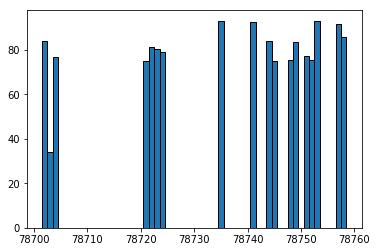

In [40]:
plt.bar(pov_by_zip_df["Zip Code"], pov_by_zip_df["Percent in Poverty"], width = 1, edgecolor = "black")

In [41]:
# help(plt.bar)

In [90]:
df.groupby(["Zip Code"])["Percent in Poverty"].max().sort_values(ascending = False)

Zip Code
78744    97.48
78748    96.83
78702    95.75
78753    95.47
78758    94.68
78735    93.09
78752    93.01
78741    92.52
78745    92.31
78757    91.84
78723    91.71
78704    89.91
78724    88.01
78749    83.54
78721    82.64
78722    81.45
78751    77.29
78703    33.93
Name: Percent in Poverty, dtype: float64

In [43]:
result = df.groupby(['Zip Code']).agg({'Driving Distance (miles)':'mean', 'Bus Distance (miles)':'mean'})

In [44]:
result

,Driving Distance (miles),Bus Distance (miles)
Zip Code,,
78702,1.342857,1.342857
78703,1.000000,1.100000
78704,1.300000,1.400000
78721,1.633333,1.833333
78722,1.100000,1.400000
78723,1.240000,1.440000
78724,3.250000,3.800000
78735,0.400000,0.600000
78741,1.400000,1.500000


In [46]:
result2 = result.unstack()

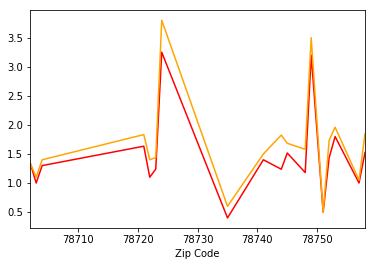

In [94]:
result2["Driving Distance (miles)"].plot(c = 'red')
result2["Bus Distance (miles)"].plot(c = 'orange')

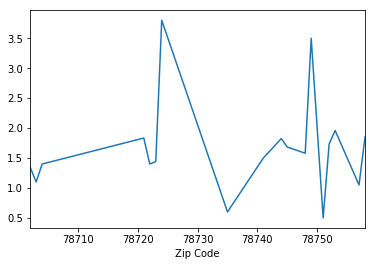

In [48]:
result2["Bus Distance (miles)"].plot()

In [55]:
max_pov = df.groupby(['Zip Code'])['Percent in Poverty'].max()
min_pov = df.groupby(['Zip Code'])['Percent in Poverty'].min()
avg_pov = df.groupby(['Zip Code'])['Percent in Poverty'].mean()

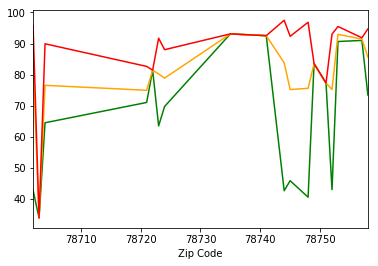

In [97]:
# We can see a huge difference in poverty level in the 78745 and 78748 zip codes

min_pov.plot(c = 'green')
avg_pov.plot(c = 'orange')
max_pov.plot(c = 'red')

In [98]:
counts = df.groupby(['Zip Code']).count()
# counts.unstack()

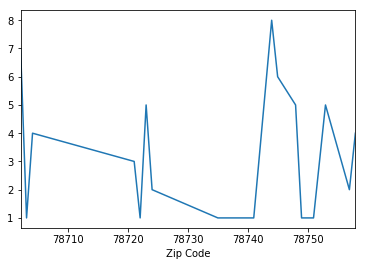

In [65]:
# Number of schools in each zip code
counts["School"].plot()

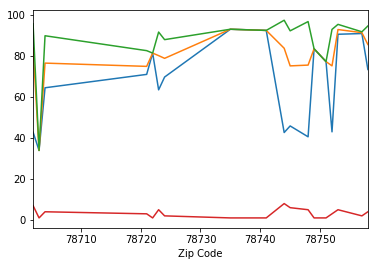

In [66]:
min_pov.plot()
avg_pov.plot()
max_pov.plot()
counts["School"].plot()

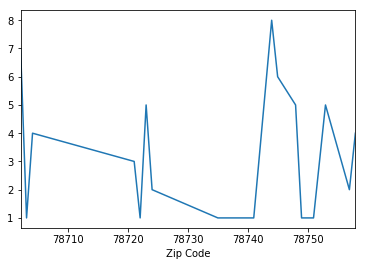

In [71]:
counts["School"].plot()

In [73]:
# help(counts.plot())

In [99]:
school_count = counts["School"].sort_values(ascending = False)

In [103]:
school_count

Zip Code
78744    8
78702    7
78745    6
78753    5
78723    5
78748    5
78704    4
78758    4
78721    3
78752    3
78757    2
78724    2
78749    1
78735    1
78751    1
78722    1
78703    1
78741    1
Name: School, dtype: int64

In [105]:
school_count_df = pd.DataFrame(school_count)

In [108]:
school_count_df.T

Zip Code,78744,78702,78745,78753,78723,78748,78704,78758,78721,78752,78757,78724,78749,78735,78751,78722,78703,78741
School,8,7,6,5,5,5,4,4,3,3,2,2,1,1,1,1,1,1


In [110]:
df["Percent in Poverty"].mean()

80.9185

In [111]:
df["Percent in Poverty"].median()

89.765

In [112]:
df["Percent in Poverty"].max()

97.48

In [113]:
df["Percent in Poverty"].min()

33.93

In [114]:
pov_by_zip_df.head(3)

,Zip Code,Percent in Poverty
0,78702,83.997143
1,78703,33.930000
2,78704,76.557500


In [117]:
pov_by_zip_df.sort_values(["Percent in Poverty"], ascending = False)

,Zip Code,Percent in Poverty
7,78735,93.090000
15,78753,92.944000
8,78741,92.520000
16,78757,91.415000
17,78758,85.640000
0,78702,83.997143
9,78744,83.807500
12,78749,83.540000
4,78722,81.450000
5,78723,80.210000


In [118]:
df.head()

,School,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Percent in Poverty,Zip Code
0,Allison Elementary,Austin,H-E-B,"2110 W Slaughter Ln, Austin",1.0,1.3,92.00,78748
1,Andrews Elementary School,Austin,H-E-B,"7112 Ed Bluestein Blvd #125, Austin",1.2,1.6,91.02,78723
2,Becker Elementary School,Austin,H-E-B,"2400 S Congress Ave, Austin",1.3,1.3,64.52,78704
3,Blackshear Elementary School,Austin,H-E-B,"2701 E 7th St, Austin",1.2,1.2,82.49,78702
4,Blanton Elementary,Austin,H-E-B,"1801 E 51st St, Austin",1.0,1.1,65.23,78723


In [141]:
distance_povertydf = df.groupby("Percent in Poverty").agg({"Driving Distance (miles)": "mean", "Bus Distance (miles)": "mean"})

In [145]:
# distance_povertydf = distance_povertydf.reset_index()
# distance_povertydf["School"] = df["School"]

In [146]:
distance_povertydf.head(2)

,Percent in Poverty,Driving Distance (miles),Bus Distance (miles),School
0,33.93,1.0,1.1,Allison Elementary
1,40.59,1.2,2.6,Andrews Elementary School


In [150]:
# distance_povertydf.sort_values("Driving Distance (miles)", ascending = False)

In [149]:
# distance_povertydf.sort_values("Bus Distance (miles)", ascending = False)

In [144]:
df.head()

,School,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Percent in Poverty,Zip Code
0,Allison Elementary,Austin,H-E-B,"2110 W Slaughter Ln, Austin",1.0,1.3,92.00,78748
1,Andrews Elementary School,Austin,H-E-B,"7112 Ed Bluestein Blvd #125, Austin",1.2,1.6,91.02,78723
2,Becker Elementary School,Austin,H-E-B,"2400 S Congress Ave, Austin",1.3,1.3,64.52,78704
3,Blackshear Elementary School,Austin,H-E-B,"2701 E 7th St, Austin",1.2,1.2,82.49,78702
4,Blanton Elementary,Austin,H-E-B,"1801 E 51st St, Austin",1.0,1.1,65.23,78723


In [155]:
# Binning by poverty level -- creating the bins

bins = [0, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ["30-40", "41-50", "51-60", "61-70", "71-80", "81-90", "90-100"]

In [156]:
df["Poverty Groups"] = df["Percent in Poverty"].copy()

In [158]:
df["Poverty Groups"] = pd.cut(df["Poverty Groups"], bins, labels = bin_labels)

In [169]:
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().sort_values(ascending = False)

Poverty Groups
81-90     1.685714
41-50     1.660000
61-70     1.500000
90-100    1.355556
71-80     1.040000
30-40     1.000000
51-60     0.900000
Name: Driving Distance (miles), dtype: float64

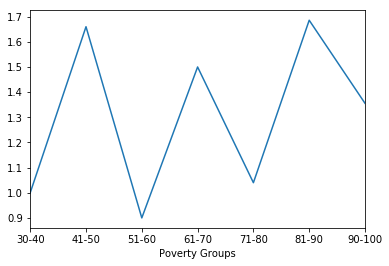

In [167]:
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot()

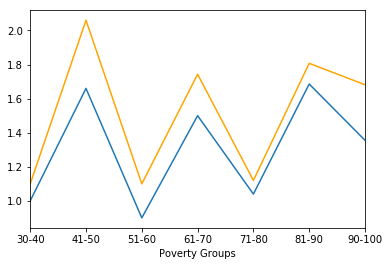

In [172]:
df.groupby("Poverty Groups")["Bus Distance (miles)"].mean().plot(c = "orange")
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot()